In [1]:
conda install seaborn

Solving environment: ...working... done
Note: you may need to restart the kernel to use updated packages.


## Package Plan ##

  environment location: C:\Users\BIT\anaconda3\envs\tf2

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-1.1.3               |   py37ha925a31_0         7.3 MB
    seaborn-0.11.0             |             py_0         210 KB
    ------------------------------------------------------------
                                           Total:         7.5 MB

The following NEW packages will be INSTALLED:

  pandas             pkgs/main/win-64::pandas-1.1.3-py37ha925a31_0
  pytz               pkgs/main/noarch::pytz-2020.1-py_0
  seaborn            pkgs/main/noarch::seaborn-0.11.0-py_0




seaborn-0.11.0       | 210 KB    |            |   0% 
seaborn-0.11.0       | 210 KB    | ########## | 100% 
seaborn-0.11.0       | 210 K

In [24]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\BIT\\.keras\\datasets\\auto-mpg.data'

In [25]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(dataset_path, names=column_names,
                          na_values = "?", comment='\t',
                          sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [26]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [27]:
dataset.value_counts()

MPG   Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  Origin
46.6  4          86.0          65.0        2110.0  17.9          80          3         1
18.0  8          307.0         130.0       3504.0  12.0          70          1         1
18.1  6          258.0         120.0       3410.0  15.1          78          1         1
      8          302.0         139.0       3205.0  11.2          78          1         1
18.2  8          318.0         135.0       3830.0  15.2          79          1         1
                                                                                      ..
27.0  4          97.0          88.0        2130.0  14.5          70          3         1
                                                                 71          3         1
                 101.0         83.0        2202.0  15.3          76          2         1
                 112.0         88.0        2640.0  18.6          82          1         1
9.0   8          304.0    

In [28]:
dataset.isna().sum() # na 데이터가 6개 존재

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [29]:
dataset = dataset.dropna() # na 지움
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [30]:
dataset.value_counts()

MPG   Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  Origin
46.6  4          86.0          65.0        2110.0  17.9          80          3         1
18.0  8          307.0         130.0       3504.0  12.0          70          1         1
18.1  6          258.0         120.0       3410.0  15.1          78          1         1
      8          302.0         139.0       3205.0  11.2          78          1         1
18.2  8          318.0         135.0       3830.0  15.2          79          1         1
                                                                                      ..
27.0  4          97.0          88.0        2130.0  14.5          70          3         1
                                                                 71          3         1
                 101.0         83.0        2202.0  15.3          76          2         1
                 112.0         88.0        2640.0  18.6          82          1         1
9.0   8          304.0    

In [31]:
origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [32]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_dataset.shape, test_dataset.shape

((314, 10), (78, 10))

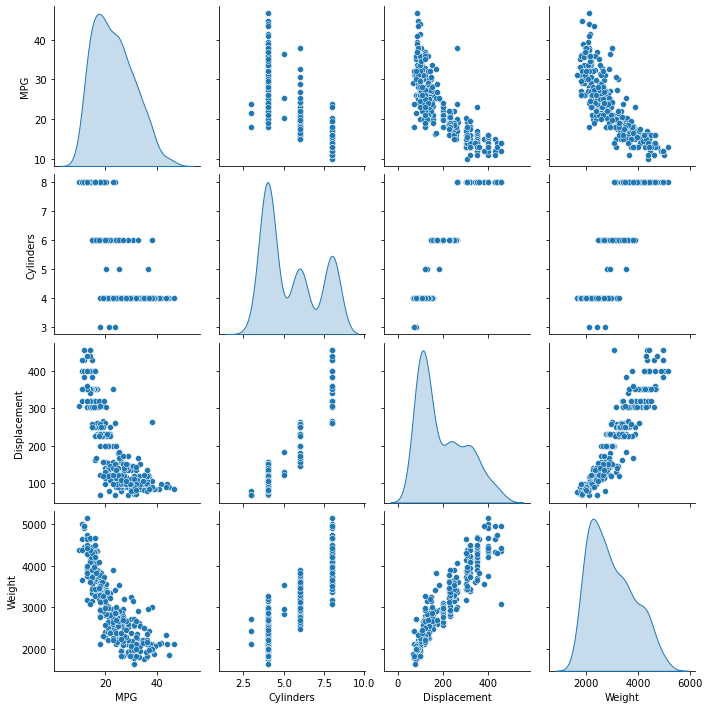

In [33]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [34]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [35]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [37]:
def norm(x):
    return(x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [38]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [39]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [40]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.36072966],
       [-0.14727066],
       [-0.22729781],
       [-0.27656686],
       [-0.01929985],
       [-0.2008903 ],
       [-0.00625256],
       [-0.04519062],
       [-0.3070389 ],
       [-0.23761852]], dtype=float32)

In [46]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련진행과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100== 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [47]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.513769,1.010933,2.513769,9.392093,2.375697,9.392094,995
996,2.493928,1.033668,2.493927,9.781614,2.423505,9.781614,996
997,2.530509,0.999469,2.530509,9.862017,2.421247,9.862017,997
998,2.511375,1.031400,2.511375,9.961601,2.461051,9.961601,998
999,2.622326,1.061911,2.622326,9.474509,2.389632,9.474508,999


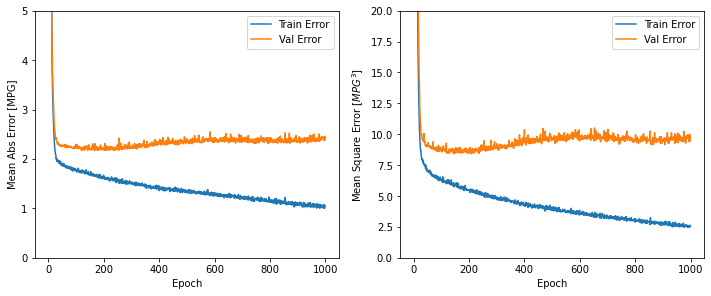

In [49]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure(figsize=(12, 10))
    
    plt.subplot(2,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
            label='Val Error')
    plt.ylim([0,5])
    plt.legend()
    
    plt.subplot(2,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^3$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
            label='Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()
plot_history(history)    

# 콜백


.................................................................................................

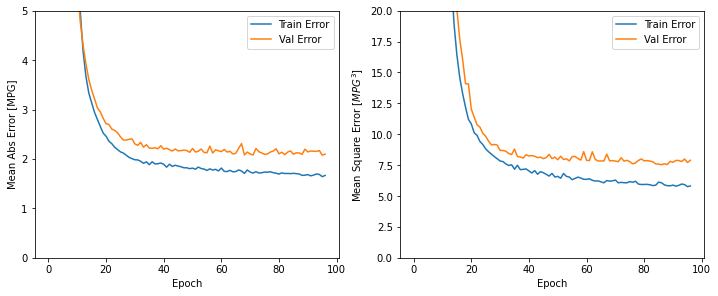

In [62]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                   validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [52]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
print("테스트세트의평균절대오차: {:5.2f} MPG".format(mae))

78/78 - 0s - loss: 5.5938 - mae: 1.8565 - mse: 5.5938
테스트세트의평균절대오차:  1.86 MPG


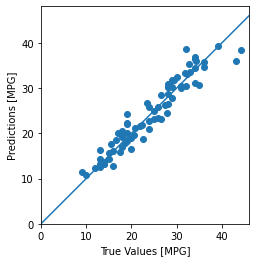

In [54]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [73]:
normed_test_data[0:1] # 테스트 데이터 1번

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
9,1.483887,1.865988,2.23462,1.018782,-2.530891,-1.604642,0.774676,-0.465148,-0.495225


ERROR! Session/line number was not unique in database. History logging moved to new session 142


In [72]:
test_labels[0:1] # 테스트 데이터 1번 MPG

9    15.0
Name: MPG, dtype: float64

ERROR! Session/line number was not unique in database. History logging moved to new session 141


In [68]:
print(model.predict(normed_test_data[0:1]).flatten()) # 테스트 데이터 1번 MPG 예측값

[16.30954]


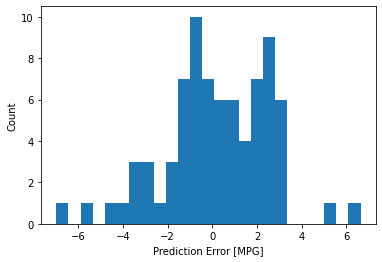

In [55]:
error = test_predictions -test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

# Ch04 회귀실습

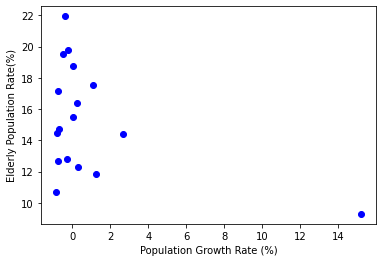

In [1]:
import matplotlib.pyplot as plt

population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.7, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27,14.44,11.87,18.75,17.52,9.29,16.37,19.78,19.51,12.65,14.74,10.72,21.94,12.83,15.51,17.14,14.42]

plt.plot(population_inc, population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate(%)')
plt.show()

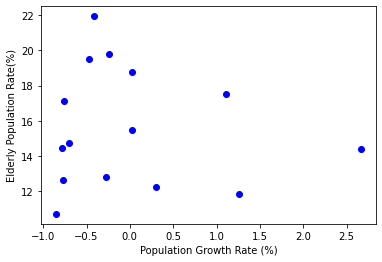

In [3]:
population_inc = population_inc[:5] + population_inc[6:]
population_old = population_old[:5] + population_old[6:]

plt.plot(population_inc, population_old, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate(%)')
plt.show()

a: -0.3372002157616666 b: 15.608922401869934


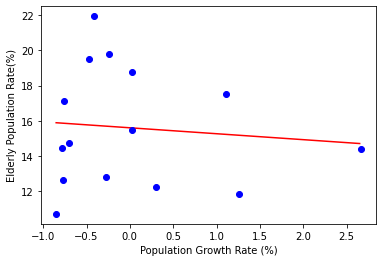

In [8]:
import pandas as pd
import numpy as np
X = population_inc
Y = population_old
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a* x_bar
print('a:', a , 'b:', b)

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

plt.plot(line_x, line_y, 'r-')

plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate(%)')
plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 155
99 a: -0.24517453 b: 6.844922 loss: 87.2066
199 a: -0.29479033 b: 11.294171 loss: 29.020777
299 a: -0.31990618 b: 13.848793 loss: 13.50305
399 a: -0.331438 b: 15.022423 loss: 10.749204
499 a: -0.33563957 b: 15.450071 loss: 10.430485
599 a: -0.33685818 b: 15.574115 loss: 10.406464
699 a: -0.3371401 b: 15.602803 loss: 10.40529
799 a: -0.33719182 b: 15.608071 loss: 10.405253
899 a: -0.33719924 b: 15.60883 loss: 10.405252
999 a: -0.33719996 b: 15.608907 loss: 10.4052515


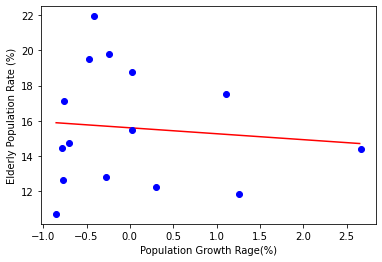

In [10]:
import tensorflow as tf
import random

a = tf.Variable(random.random())
b = tf.Variable(random.random())

def compute_loss():
    y_pred = a * X + b
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)

for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[a,b])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())
        
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

plt.plot(line_x, line_y, 'r-'); plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rage(%)'); plt.ylabel('Elderly Population Rate (%)')
plt.show()


# 경사하강법

In [19]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    w0_factors = np.ones((N,1))
    
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

def gradient_descent_steps(x, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y , learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [20]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    
    return cost

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


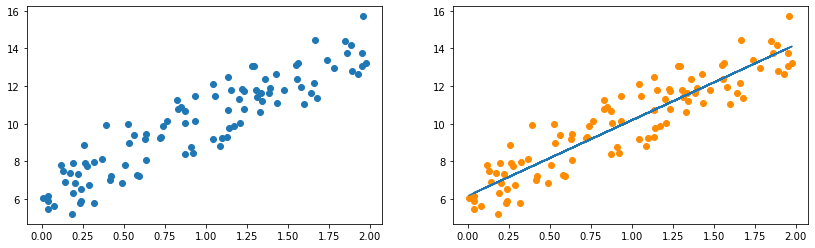

In [23]:
import numpy as np
import matplotlib.pyplot as pllt

np.random.seed(0)

X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))

y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

fig, (ax1, ax2) = plt.subplots(figsize=(14,4), ncols=2)

ax1.scatter(X, y)
ax2.scatter(X, y, c='darkorange')
ax2.plot(X, y_pred)
plt.show()

# 다항함수의 회귀

99 a: 3.9213367 b: -5.646609 c: 6.5990396 loss: 66.94583
199 a: 2.7052352 b: -4.5179343 c: 10.452969 loss: 30.396048
299 a: 1.208682 b: -2.2446787 c: 13.062486 loss: 15.531687
399 a: 0.27204594 b: -0.8071441 c: 14.664788 loss: 10.810831
499 a: -0.21846734 b: -0.054683592 c: 15.505377 loss: 9.688089
599 a: -0.43924028 b: 0.28395763 c: 15.883837 loss: 9.486552
699 a: -0.5249636 b: 0.4154447 c: 16.030796 loss: 9.459157
799 a: -0.55371517 b: 0.4595469 c: 16.080086 loss: 9.456341
899 a: -0.56203294 b: 0.47230455 c: 16.094349 loss: 9.456122
999 a: -0.5641024 b: 0.47547868 c: 16.097895 loss: 9.456112


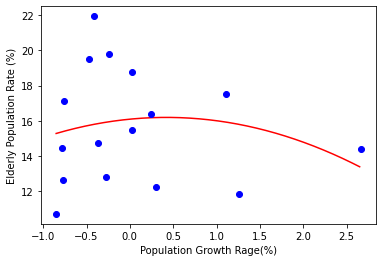

In [29]:
import tensorflow as tf

X = [0.3,-0.78,1.26,0.03,1.11,0.24,-0.24,-0.47,-0.77,-0.37,-0.85,-0.41,-0.27,0.02,-0.76,2.66]
Y = [12.27,14.44,11.87,18.75,17.52,16.37,19.78,19.51,12.65,14.74,10.72,21.94,12.83,15.51,17.14,14.42]

a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

def compute_loss():
    y_pred = a * X*X + b*X + c
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)

for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())
        
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x*line_x + b * line_x + c

plt.plot(line_x, line_y, 'r-'); plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rage(%)'); plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: -1.2143146 b: 6.0094256 c: -3.9399211 d: 6.4286695 loss: 62.211823
199 a: -2.0005193 b: 6.862542 c: -2.2746623 d: 9.963041 loss: 30.603157
299 a: -1.6624409 b: 5.0995646 c: -0.935323 d: 12.123063 loss: 19.97829
399 a: -0.9143783 b: 2.7515662 c: -0.5643272 d: 13.637588 loss: 14.130581
499 a: -0.20270501 b: 0.6688396 c: -0.4688201 d: 14.774528 loss: 10.843944
599 a: 0.35150662 b: -0.9326088 c: -0.42887175 d: 15.617329 loss: 9.190161
699 a: 0.7455056 b: -2.0686157 c: -0.40456817 d: 16.210987 loss: 8.449741
799 a: 1.0073841 b: -2.82335 c: -0.38893887 d: 16.604763 loss: 8.154278
899 a: 1.1709172 b: -3.2945988 c: -0.3792611 d: 16.850527 loss: 8.0491495
999 a: 1.2669524 b: -3.5713296 c: -0.37359595 d: 16.994822 loss: 8.015831


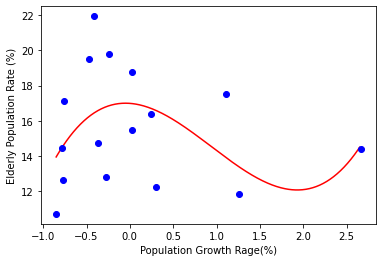

In [32]:
import tensorflow as tf

X = [0.3,-0.78,1.26,0.03,1.11,0.24,-0.24,-0.47,-0.77,-0.37,-0.85,-0.41,-0.27,0.02,-0.76,2.66]
Y = [12.27,14.44,11.87,18.75,17.52,16.37,19.78,19.51,12.65,14.74,10.72,21.94,12.83,15.51,17.14,14.42]

a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

def compute_loss():
    y_pred = a * X*X*X + b * X*X + c * X + d
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)

for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[a,b,c,d])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:', d.numpy(), 'loss:', compute_loss().numpy())
        
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x*line_x*line_x + b * line_x*line_x + c * line_x + d

plt.plot(line_x, line_y, 'r-'); plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rage(%)'); plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 딥러닝 네트워크를 이용한 회귀

In [46]:
import tensorflow as tf
import numpy as np

X = [0.3,-0.78,1.26,0.03,1.11,0.24,-0.24,-0.47,-0.77,-0.37,-0.85,-0.41,-0.27,0.02,-0.76,2.66]
Y = [12.27,14.44,11.87,18.75,17.52,16.37,19.78,19.51,12.65,14.74,10.72,21.94,12.83,15.51,17.14,14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X, Y, epochs=10)

Train on 16 samples
Epoch 1/10
16/16 [==============================] - 0s 19ms/sample - loss: 253.3246
Epoch 2/10
16/16 [==============================] - 0s 97us/sample - loss: 107.7992
Epoch 3/10
16/16 [==============================] - 0s 0s/sample - loss: 9.9825
Epoch 4/10
16/16 [==============================] - 0s 1ms/sample - loss: 9.6985
Epoch 5/10
16/16 [==============================] - 0s 374us/sample - loss: 9.6834
Epoch 6/10
16/16 [==============================] - 0s 372us/sample - loss: 9.6804
Epoch 7/10
16/16 [==============================] - 0s 71us/sample - loss: 9.6784
Epoch 8/10
16/16 [==============================] - 0s 0s/sample - loss: 9.6765
Epoch 9/10
16/16 [==============================] - 0s 1ms/sample - loss: 9.6745
Epoch 10/10
16/16 [==============================] - 0s 374us/sample - loss: 9.6724


In [48]:
model.predict(X)

ERROR! Session/line number was not unique in database. History logging moved to new session 163


array([[15.781511 ],
       [15.77391  ],
       [15.5111   ],
       [15.801766 ],
       [15.57981  ],
       [15.787622 ],
       [15.805433 ],
       [15.797675 ],
       [15.774892 ],
       [15.802169 ],
       [15.766656 ],
       [15.8005705],
       [15.80495  ],
       [15.802178 ],
       [15.775861 ],
       [14.062381 ]], dtype=float32)

ERROR! Session/line number was not unique in database. History logging moved to new session 164


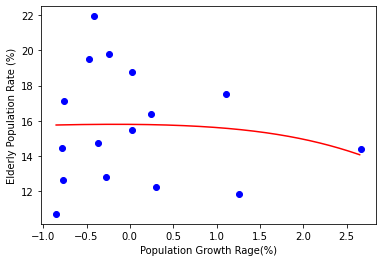

In [49]:
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-'); plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rage(%)'); plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 보스턴 주택 가격 데이터셋

In [95]:
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

In [96]:
print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [97]:
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [98]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 52)                728       
_________________________________________________________________
dense_39 (Dense)             (None, 39)                2067      
_________________________________________________________________
dense_40 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [99]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 1ms/sample - loss: 1.7597 - val_loss: 1.0872
Epoch 2/25
303/303 [==============================] - 0s 65us/sample - loss: 0.5262 - val_loss: 0.6427
Epoch 3/25
303/303 [==============================] - 0s 79us/sample - loss: 0.4186 - val_loss: 0.4037
Epoch 4/25
303/303 [==============================] - 0s 76us/sample - loss: 0.2972 - val_loss: 0.3953
Epoch 5/25
303/303 [==============================] - 0s 72us/sample - loss: 0.2232 - val_loss: 0.3522
Epoch 6/25
303/303 [==============================] - 0s 66us/sample - loss: 0.1997 - val_loss: 0.3252
Epoch 7/25
303/303 [==============================] - 0s 76us/sample - loss: 0.1846 - val_loss: 0.3359
Epoch 8/25
303/303 [==============================] - 0s 72us/sample - loss: 0.1763 - val_loss: 0.3268
Epoch 9/25
303/303 [==============================] - 0s 76us/sample - loss: 0.2190 - val_loss: 0.3993
Epoch 10/25
303/303 [=======

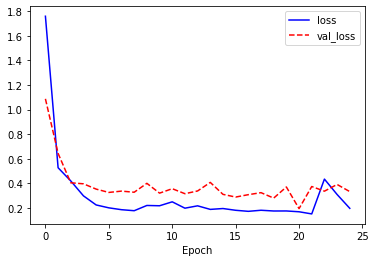

In [101]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [100]:
model.evaluate(test_X, test_Y)

102/102 [==============================] - 0s 68us/sample - loss: 0.2283


0.22827560761395624

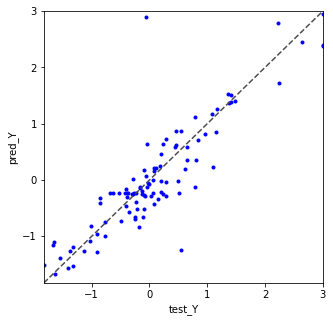

In [102]:
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls='--', c='.3')
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [103]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
                   callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 1s 2ms/sample - loss: 2.4800 - val_loss: 0.8493
Epoch 2/25
303/303 [==============================] - 0s 69us/sample - loss: 0.5814 - val_loss: 0.5859
Epoch 3/25
303/303 [==============================] - 0s 76us/sample - loss: 0.3613 - val_loss: 0.4296
Epoch 4/25
303/303 [==============================] - 0s 73us/sample - loss: 0.2829 - val_loss: 0.3324
Epoch 5/25
303/303 [==============================] - 0s 76us/sample - loss: 0.2031 - val_loss: 0.2698
Epoch 6/25
303/303 [==============================] - 0s 63us/sample - loss: 0.1782 - val_loss: 0.2290
Epoch 7/25
303/303 [==============================] - 0s 72us/sample - loss: 0.1679 - val_loss: 0.2052
Epoch 8/25
303/303 [==============================] - 0s 66us/sample - loss: 0.1434 - val_loss: 0.1469
Epoch 9/25
303/303 [==============================] - 0s 79us/sample - loss: 0.1334 - val_loss: 0.1419
Epoch 10/25
303/303 [=======

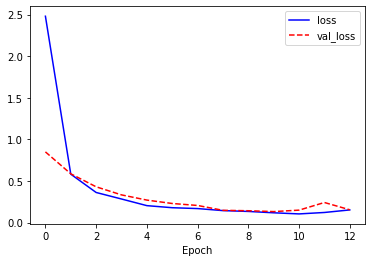

In [104]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [82]:
model.evaluate(test_X, test_Y)

102/102 [==============================] - 0s 98us/sample - loss: 0.2216


0.22155453177059398

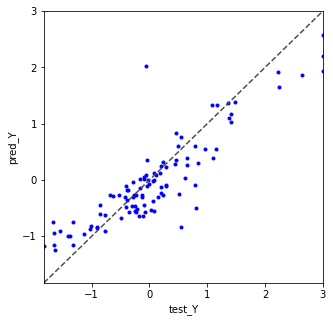

In [83]:
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls='--', c='.3')
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()